# HW 1

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# Загружаем выборку Diamonds

На данной выборке можно проверять работоспособность своего решения

1. PRICE: price in US dollars (326-18,823)
2. CARAT: weight of the diamond (0.2--5.01)
3. CUT: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. COLOR: diamond colour, from J (worst) to D (best)
5. CLARITY: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. X: length in mm (0--10.74)
7. Y: width in mm (0--58.9)
8. Z: depth in mm (0--31.8)
9. DEPTH: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. TABLE: width of top of diamond relative to widest point (43--95)

In [3]:
diamonds_df = pd.read_csv('diamonds.csv')

In [4]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


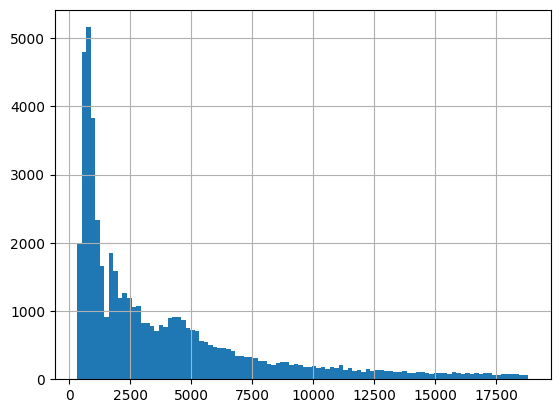

In [5]:
plt.hist(diamonds_df['price'], bins=100)
plt.grid();

# Подготовка данных

In [6]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [7]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [8]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

In [9]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)

In [11]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучаем модель линейной регрессии

In [12]:
reg = LinearRegression().fit(X_train, y_train)

In [13]:
y_pred = reg.predict(X_test)

In [14]:
score = r2_score(y_pred, y_test)

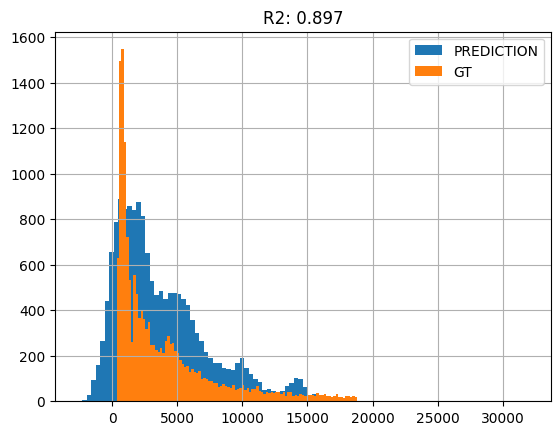

In [15]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

# Задание 1: Реализация Gradient Descent для модели линейной регрессии

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [24]:
class LinearRegressorGD:
    """
    Линейная регрессия с использованием Gradient Descent
    """

    def __init__(self, learning_rate=0.01, n_iter=1000):
        """
        Конструктор класса

        Параметры:
            learning_rate (float): Скорость обучения
            n_iter (int): Количество итераций градиентного спуска
        """
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = 52
        self.weights = []
        self.biases = []
        self.loss_history_ = []

    def fit(self, X, y):
        """
        Обучение модели на обучающей выборке с использованием
        градиентного спуска

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        X = np.asarray(X, dtype=float)
        y = np.asarray(y, dtype=float).reshape(-1)
        m, n = X.shape

        X_mean = X.mean(axis=0)
        y_mean = y.mean()
        Xc = X - X_mean
        yc = y - y_mean

        rng = np.random.default_rng(self.random_state)
        w = rng.normal(0.0, 1e-3, size=n)

        sigma_max = np.linalg.norm(Xc, 2)
        L = (sigma_max ** 2) / m if m > 0 else 1.0
        eta = 1.0 / L

        self.loss_history_.clear()
        for _ in range(self.n_iter):
            y_hat = Xc @ w
            r = y_hat - yc
            loss = (r @ r) / (2.0 * m)
            self.loss_history_.append(float(loss))

            grad_w = (Xc.T @ r) / m
            w -= eta * grad_w

            if len(self.loss_history_) > 1:
                prev = self.loss_history_[-2]
                if prev > 0 and abs(prev - loss) / prev < 1e-8:
                    break

        b = y_mean - X_mean @ w
        self.weights = w
        self.biases = float(b)
        return self

    def predict(self, X):
        """
        Получение предсказаний обученной модели

        Параметры:
            X (np.ndarray): Матрица признаков

        Возвращает:
            np.ndarray: Предсказание для каждого элемента из X
        """
        X = np.asarray(X, dtype=float)
        if X.ndim == 1:
            X = X.reshape(1, -1)
        return X @ self.weights + self.biases

    def get_params(self):
        """
        Возвращает обученные параметры модели
        """
        return self.weights.copy(), float(self.biases)


In [33]:
y_train_1d = y_train.reshape(-1)
y_test_1d  = y_test.reshape(-1)

gd = LinearRegressorGD(learning_rate=0.1, n_iter=2000)
gd.fit(X_train, y_train_1d)

y_pred_train = gd.predict(X_train)
y_pred_test  = gd.predict(X_test)

r2_train = r2_score(y_train_1d, y_pred_train)
r2_test  = r2_score(y_test_1d,  y_pred_test)

print("Оценка качества")
print(f"R^2 (train): {r2_train:.6f}")
print(f"R^2 (test) : {r2_test:.6f}")

=== Результаты Gradient Descent ===
R^2 (train): 0.906938
R^2 (test) : 0.907045


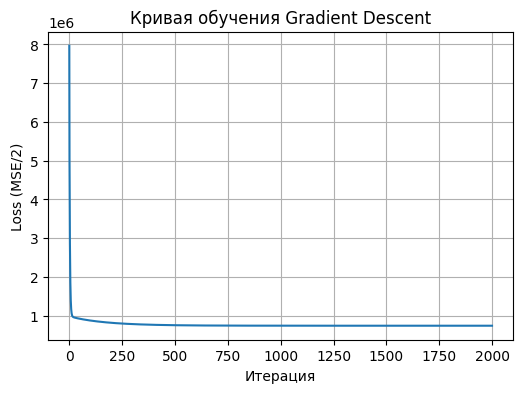

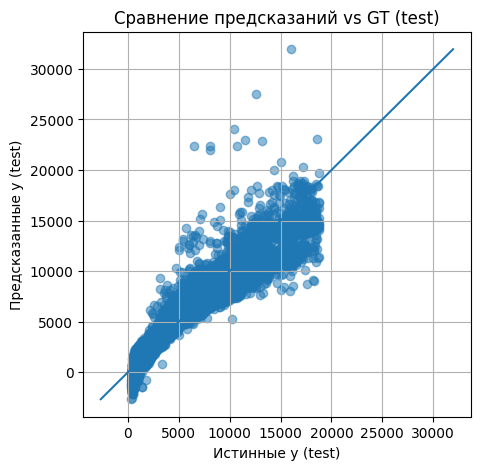

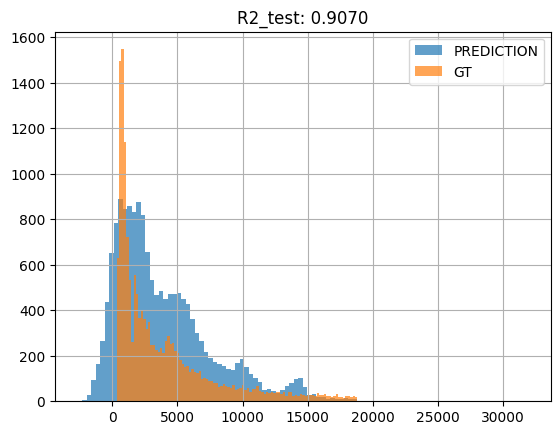

In [34]:
plt.figure(figsize=(6,4))
plt.plot(gd.loss_history_)
plt.xlabel("Итерация")
plt.ylabel("Loss")
plt.title("Кривая обучения Gradient Descent")
plt.grid()
plt.show()

y_pred_test = gd.predict(X_test).reshape(-1)
y_test = y_test.reshape(-1)

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_test, alpha=0.5)
mn = float(min(y_test.min(), y_pred_test.min()))
mx = float(max(y_test.max(), y_pred_test.max()))
plt.plot([mn, mx], [mn, mx])
plt.xlabel("Истинные y (test)")
plt.ylabel("Предсказанные y (test)")
plt.title("Сравнение предсказаний vs GT (test)")
plt.grid()
plt.show()

plt.title(f'R2_test: {r2_test:.4f}')
plt.hist(y_pred_test, bins=100, alpha=0.7, label='PREDICTION')
plt.hist(y_test, bins=100, alpha=0.7, label='GT')
plt.legend()
plt.grid()
plt.show()


# Задание 2: Реализация backpropagation для MLP

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

В качестве функции активации на внутренних слоях нужно использовать Sigmoid, а на выходе - линейную активацию f(x) = x

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [16]:
class MLPRegressor:
    """
    Многослойный перцептрон (MLP) для задачи регрессии, использующий алгоритм
    обратного распространения ошибки
    """

    def __init__(self, num_inputs, num_outputs, hidden_layer_sizes=(100,), learning_rate=0.001, maxiter=1000, random_state=42):
        """
        Конструктор класса

        Параметры:
            hidden_layer_sizes (tuple): Кортеж, определяющий архитектуру
        скрытых слоев. Например (100, 10) - два скрытых слоя, размером 100 и 10
        нейронов, соответственно
            learning_rate (float): Скорость обучения
            n_iter (int): Количество итераций градиентного спуска
        """
        self.hidden_layers = hidden_layer_sizes
        self.learning_rate = learning_rate
        self.maxiter = maxiter
        layers = [num_inputs] + list(self.hidden_layers) + [num_outputs]

        rng = np.random.default_rng(random_state)
        self.weights = []
        self.biases = []
        for i in range(len(layers) - 1):
            w = rng.normal(0.0, 0.1, size=(layers[i], layers[i + 1]))
            b = np.zeros((1, layers[i + 1]))
            self.weights.append(w)
            self.biases.append(b)

        self.activations = [None] * len(layers)
        self.z_values = [None] * len(layers)

        self.grad_w = [np.zeros_like(w) for w in self.weights]
        self.grad_b = [np.zeros_like(b) for b in self.biases]

        self.loss_history = []

    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))

    def dsigmoid(self, a):
        return a * (1.0 - a)

    def forward(self, X):
        """
        Реализация forward pass

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)

        Возвращает:
            np.ndarray: Предсказания модели
        """
        A = np.asarray(X, dtype=float)
        self.activations[0] = A
        self.z_values[0] = None

        for i in range(len(self.weights) - 1):
            Z = A @ self.weights[i] + self.biases[i]
            A = self.sigmoid(Z)
            self.z_values[i + 1] = Z
            self.activations[i + 1] = A

        ZL = A @ self.weights[-1] + self.biases[-1]
        self.z_values[-1] = ZL
        self.activations[-1] = ZL
        return ZL

    def backward(self, X, y):
        """
        Реализация backward pass

        Возвращает:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        m = X.shape[0]
        y = y.reshape(-1, 1)
        y_pred = self.activations[-1]

        for i in range(len(self.grad_w)):
            self.grad_w[i].fill(0.0)
            self.grad_b[i].fill(0.0)

        dA = (2.0 / m) * (y_pred - y)
        L = len(self.weights) - 1
        A_prev = self.activations[L]
        dZ = dA
        self.grad_w[L] = A_prev.T @ dZ
        self.grad_b[L] = np.sum(dZ, axis=0, keepdims=True)

        dA_prev = dZ @ self.weights[L].T

        for i in range(L - 1, -1, -1):
            Ai = self.activations[i + 1]
            dZ = dA_prev * self.dsigmoid(Ai)
            A_prev = self.activations[i]
            self.grad_w[i] = A_prev.T @ dZ
            self.grad_b[i] = np.sum(dZ, axis=0, keepdims=True)
            if i > 0:
                dA_prev = dZ @ self.weights[i].T


    def fit(self, X, y):
        """
        Обучение модели

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        X = np.asarray(X, dtype=float)
        y = np.asarray(y, dtype=float)
        if y.ndim == 1:
            y = y.reshape(-1, 1)

        self.loss_history = []
        for epoch in range(self.maxiter):
            y_pred = self.forward(X)
            diff = y_pred - y
            loss = float(np.mean(diff * diff))
            self.loss_history.append(loss)

            self.backward(X, y)
            for i in range(len(self.weights)):
                self.weights[i] = self.weights[i] - self.learning_rate * self.grad_w[i]
                self.biases[i]  = self.biases[i]  - self.learning_rate * self.grad_b[i]

        return self

    def predict(self, X):
        """
        Получение предсказаний обученной модели

        Параметры:
            X (np.ndarray): Матрица признаков

        Возвращает:
            np.ndarray: Предсказание для каждого элемента из X
        """
        y_hat = self.forward(X)
        if y_hat.shape[1] == 1:
            return y_hat.reshape(-1)
        return y_hat


Оценка качества
R^2 (train): 0.755006
R^2 (test) : 0.757542
MSE (train): 3901151.3
MSE (test) : 3853651.0
MAE (train): 1276.095
MAE (test) : 1271.638


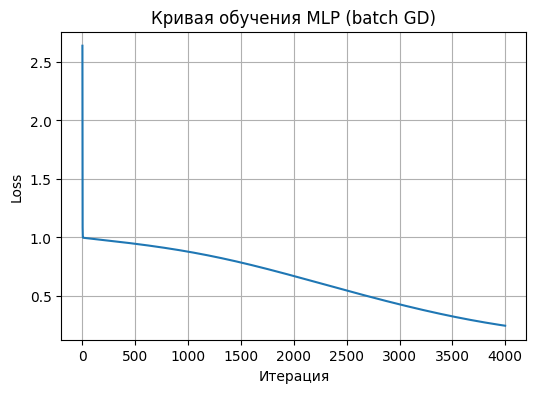

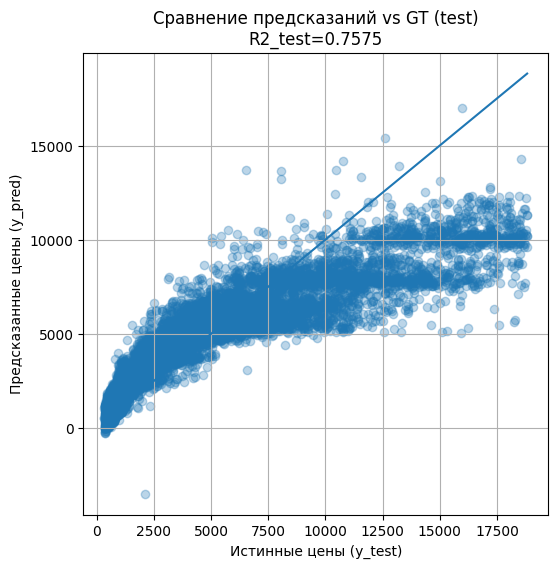

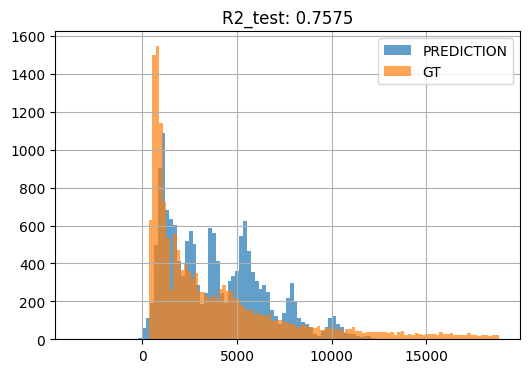

In [39]:
y_tr = y_train.reshape(-1)
y_te = y_test.reshape(-1)
y_mean = y_tr.mean()
y_std  = y_tr.std() + 1e-12
y_tr_n = (y_tr - y_mean) / y_std
y_te_n = (y_te - y_mean) / y_std

mlp = MLPRegressor(
    num_inputs=X_train.shape[1],
    num_outputs=1,
    hidden_layer_sizes=(100,),
    learning_rate=1e-2,
    maxiter=4000,
    random_state=0
)

mlp.fit(X_train, y_tr_n)

y_train_1d = y_train.reshape(-1)
y_test_1d  = y_test.reshape(-1)

y_mean = y_train_1d.mean()
y_std  = y_train_1d.std() + 1e-12

y_pred_train_norm = mlp.predict(X_train)
y_pred_test_norm  = mlp.predict(X_test)

y_pred_train = y_pred_train_norm * y_std + y_mean
y_pred_test  = y_pred_test_norm  * y_std + y_mean

r2_train = r2_score(y_train_1d, y_pred_train)
r2_test  = r2_score(y_test_1d,  y_pred_test)
mse_train = mean_squared_error(y_train_1d, y_pred_train)
mse_test  = mean_squared_error(y_test_1d,  y_pred_test)
mae_train = mean_absolute_error(y_train_1d, y_pred_train)
mae_test  = mean_absolute_error(y_test_1d,  y_pred_test)

print("Оценка качества")
print(f"R^2 (train): {r2_train:.6f}")
print(f"R^2 (test) : {r2_test :.6f}")
print(f"MSE (train): {mse_train:.1f}")
print(f"MSE (test) : {mse_test :.1f}")
print(f"MAE (train): {mae_train:.3f}")
print(f"MAE (test) : {mae_test :.3f}")

plt.figure(figsize=(6,4))
plt.plot(mlp.loss_history)
plt.xlabel("Итерация")
plt.ylabel("Loss")
plt.title("Кривая обучения MLP (batch GD)")
plt.grid()
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_test_1d, y_pred_test, alpha=0.3)
plt.plot([y_test_1d.min(), y_test_1d.max()],
         [y_test_1d.min(), y_test_1d.max()])
plt.xlabel("Истинные цены (y_test)")
plt.ylabel("Предсказанные цены (y_pred)")
plt.title(f"Сравнение предсказаний vs GT (test)\nR2_test={r2_test:.4f}")
plt.grid()
plt.show()

plt.figure(figsize=(6,4))
plt.title(f'R2_test: {r2_test:.4f}')
plt.hist(y_pred_test, bins=100, alpha=0.7, label='PREDICTION')
plt.hist(y_test_1d,  bins=100, alpha=0.7, label='GT')
plt.legend()
plt.grid()
plt.show()